In [1]:
from growth_rate import compute_growth_rate_classified, compute_instantaneous_growth_rate_classified, compute_instantaneous_growth_rate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter, medfilt

In [2]:
filemap_path = "/mnt/external.data/TowbinLab/spsalmon/pipeline_test_folder/analysis/report/analysis_filemap.csv"
filemap = pd.read_csv(filemap_path)

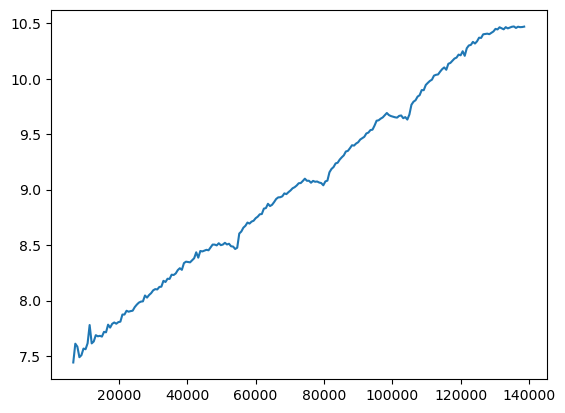

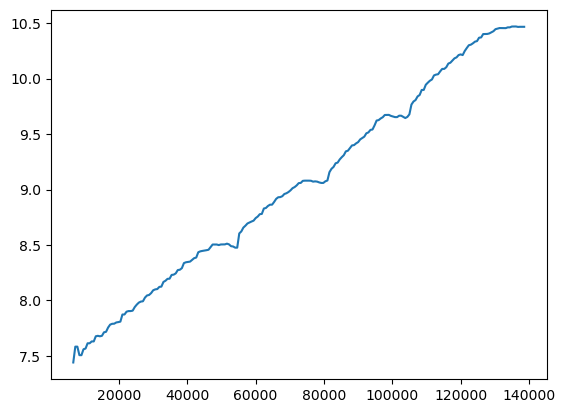

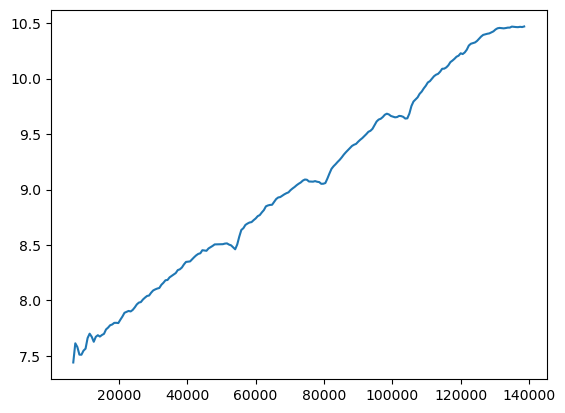

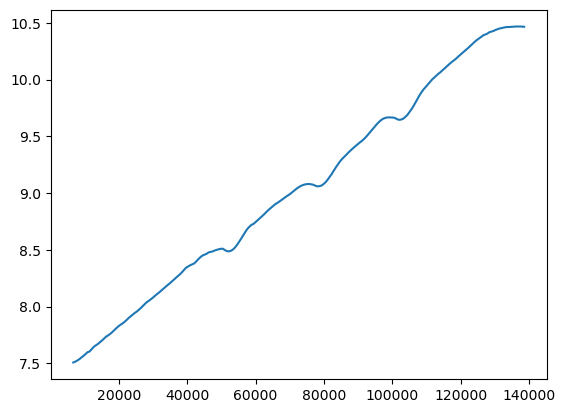

AssertionError: The volume, time, and worm_type must have the same length.

In [16]:
volume = filemap['ch2_seg_str_area'].to_numpy()
time = filemap['ExperimentTime'].to_numpy()
classification = filemap['ch2_seg_str_worm_type'].to_numpy()

hatch = int(filemap['HatchTime'].iloc[0])
m4 = int(filemap['M4'].iloc[0])

volume = volume[hatch:m4]
time = time[hatch:m4]
classification = classification[hatch:m4]

volume = volume[classification == 'worm']
time = time[classification == 'worm']

plt.plot(time, np.log(volume))
plt.show()

volume_median_filtered = medfilt(volume, kernel_size=3)

plt.plot(time, np.log(volume_median_filtered))
plt.show()

volume_savgol_filtered = savgol_filter(volume, 5, 3)

plt.plot(time, np.log(volume_savgol_filtered))
plt.show()

volume_savgol_median_filtered = savgol_filter(volume_median_filtered, 15, 3)

plt.plot(time, np.log(volume_savgol_median_filtered))
plt.show()

growth_rate = compute_instantaneous_growth_rate_classified(volume, time, classification, savgol_filter_window=11, savgol_filter_order=3)

plt.plot(growth_rate)
plt.show()

In [4]:
diff = np.diff(log_volume_l1)/np.diff(time_l1)
plt.plot(time_l1[:-1], diff)
plt.show()
print(np.mean(diff))
print(np.median(diff))

NameError: name 'log_volume_l1' is not defined